In [ ]:
import tensorflow as tf
import os

tf.keras.utils.get_file('horse-or-human.zip',"https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip")

'/root/.keras/datasets/horse-or-human.zip'

In [ ]:
import os
import zipfile #to handle zip file

local_zip = '/root/.keras/datasets/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')
zip_ref.close()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pathlib

In [ ]:
data_dir = pathlib.Path('horse-or-human')
data_dir

PosixPath('horse-or-human')

In [ ]:
os.listdir('horse-or-human')

['horses', 'humans']

In [ ]:
os.listdir('horse-or-human/humans')

['human01-06.png',
 'human10-28.png',
 'human07-05.png',
 'human16-07.png',
 'human07-26.png',
 'human14-00.png',
 'human13-09.png',
 'human16-23.png',
 'human11-19.png',
 'human03-29.png',
 'human06-02.png',
 'human05-24.png',
 'human11-14.png',
 'human06-03.png',
 'human13-27.png',
 'human04-20.png',
 'human05-26.png',
 'human16-19.png',
 'human02-17.png',
 'human17-04.png',
 'human02-12.png',
 'human10-23.png',
 'human12-14.png',
 'human15-08.png',
 'human14-18.png',
 'human16-00.png',
 'human12-24.png',
 'human11-02.png',
 'human05-10.png',
 'human04-06.png',
 'human12-01.png',
 'human03-27.png',
 'human10-14.png',
 'human11-04.png',
 'human03-11.png',
 'human08-26.png',
 'human05-25.png',
 'human14-28.png',
 'human11-00.png',
 'human04-13.png',
 'human04-03.png',
 'human01-04.png',
 'human04-14.png',
 'human16-30.png',
 'human12-10.png',
 'human03-18.png',
 'human13-00.png',
 'human15-07.png',
 'human13-21.png',
 'human11-22.png',
 'human13-15.png',
 'human15-06.png',
 'human05-17

In [ ]:
len(os.listdir('horse-or-human/humans'))

527

In [ ]:
os.listdir('horse-or-human/horses')

['horse18-5.png',
 'horse08-6.png',
 'horse08-4.png',
 'horse32-9.png',
 'horse01-1.png',
 'horse34-3.png',
 'horse31-6.png',
 'horse06-1.png',
 'horse42-7.png',
 'horse39-8.png',
 'horse24-1.png',
 'horse41-4.png',
 'horse36-9.png',
 'horse04-2.png',
 'horse49-4.png',
 'horse12-7.png',
 'horse24-7.png',
 'horse02-6.png',
 'horse37-3.png',
 'horse04-3.png',
 'horse42-8.png',
 'horse03-6.png',
 'horse29-1.png',
 'horse03-2.png',
 'horse19-4.png',
 'horse19-6.png',
 'horse48-2.png',
 'horse05-0.png',
 'horse15-1.png',
 'horse29-9.png',
 'horse33-0.png',
 'horse05-3.png',
 'horse49-7.png',
 'horse12-1.png',
 'horse39-9.png',
 'horse02-3.png',
 'horse43-7.png',
 'horse31-8.png',
 'horse33-2.png',
 'horse28-1.png',
 'horse02-9.png',
 'horse03-0.png',
 'horse47-7.png',
 'horse09-5.png',
 'horse16-5.png',
 'horse25-3.png',
 'horse50-8.png',
 'horse12-3.png',
 'horse09-8.png',
 'horse37-5.png',
 'horse09-6.png',
 'horse30-1.png',
 'horse07-0.png',
 'horse13-1.png',
 'horse20-8.png',
 'horse05-

In [ ]:
len(os.listdir('horse-or-human/horses'))

500

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob   #to handle folder/Directory

In [ ]:
data_dir


PosixPath('horse-or-human')

In [ ]:
from keras.preprocessing.image import load_img,img_to_array,array_to_img

In [ ]:
image1=load_img('horse-or-human/horses/horse02-3.png')

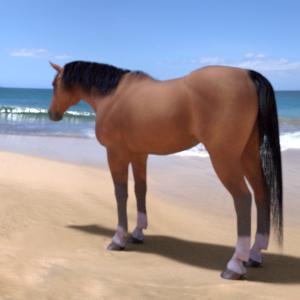

In [ ]:
image1

In [ ]:
image2=load_img('horse-or-human/humans/human01-14.png')

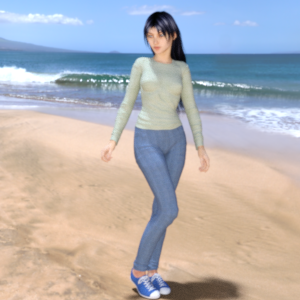

In [ ]:
image2

In [ ]:
batch_size = 60
epochs = 20
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                     class_mode='binary',
                                                    subset='training')

Found 822 images belonging to 2 classes.


In [ ]:
train_data_gen.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                 class_mode='binary',
                                                subset='validation')

Found 205 images belonging to 2 classes.


In [ ]:
val_data_gen.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
sample_image, labels = next(train_data_gen)

In [ ]:
sample_image.shape

(60, 224, 224, 3)

In [ ]:
sample_image[0]

array([[[0.21635251, 0.25623444, 0.17930706],
        [0.21653296, 0.25557035, 0.17424236],
        [0.20694737, 0.23320398, 0.1550712 ],
        ...,
        [0.22352943, 0.227451  , 0.16470589],
        [0.22352943, 0.227451  , 0.16470589],
        [0.22352943, 0.227451  , 0.16470589]],

       [[0.20743078, 0.23839095, 0.17543966],
        [0.21201737, 0.24756415, 0.177862  ],
        [0.21681017, 0.25714976, 0.1794596 ],
        ...,
        [0.22352943, 0.227451  , 0.16470589],
        [0.22352943, 0.227451  , 0.16470589],
        [0.22521146, 0.22955354, 0.16680843]],

       [[0.20134549, 0.22622037, 0.16022645],
        [0.20454068, 0.23261076, 0.16821443],
        [0.20773588, 0.23900115, 0.17620242],
        ...,
        [0.2326756 , 0.23888372, 0.17613861],
        [0.23731875, 0.24468765, 0.18194255],
        [0.23578295, 0.24225299, 0.18294065]],

       ...,

       [[0.5567685 , 0.4784314 , 0.42352945],
        [0.55560774, 0.4784314 , 0.42352945],
        [0.55444694, 0

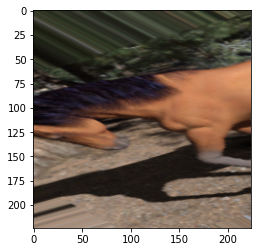

In [ ]:
plt.imshow(sample_image[0])

In [ ]:
labels[0]

0.0

In [ ]:
labels

array([0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Dropout
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
   
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_gen,validation_data=val_data_gen,epochs=epochs,verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - 14s 1s/step - loss: 1.3260 - accuracy: 0.5499 - val_loss: 0.6526 - val_accuracy: 0.8341
Epoch 2/20
14/14 [==============================] - 13s 961ms/step - loss: 0.6246 - accuracy: 0.6679 - val_loss: 0.4660 - val_accuracy: 0.8683
Epoch 3/20
14/14 [==============================] - 14s 968ms/step - loss: 0.4638 - accuracy: 0.7859 - val_loss: 0.3769 - val_accuracy: 0.7659
Epoch 4/20
14/14 [==============================] - 14s 970ms/step - loss: 0.4007 - accuracy: 0.8151 - val_loss: 0.3871 - val_accuracy: 0.8537
Epoch 5/20
14/14 [==============================] - 14s 979ms/step - loss: 0.3229 - accuracy: 0.8577 - val_loss: 0.2280 - val_accuracy: 0.9756
Epoch 6/20
14/14 [==============================] - 14s 985ms/step - loss: 0.3295 - accuracy: 0.8504 - val_loss: 0.2485 - val_accuracy: 0.9317
Epoch 7/20
14/14 [==============================] - 14s 963ms/step - loss: 0.3094 - accuracy: 0.8650 - val_loss: 0.2705 - val_accuracy: 0.8683
Epoch 8/20
14

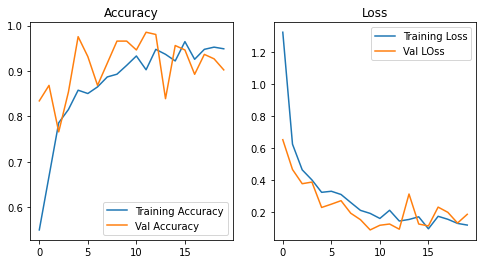

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
test = load_img('hhh.jpg',target_size=(224,224))

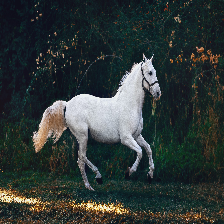

In [ ]:
test

In [ ]:
test_array = img_to_array(test)

In [ ]:
test_array

array([[[ 15.,  19.,  30.],
        [ 15.,  17.,  29.],
        [ 15.,  19.,  30.],
        ...,
        [ 23.,  35.,  33.],
        [ 19.,  34.,  37.],
        [ 38.,  53.,  48.]],

       [[ 15.,  19.,  30.],
        [ 14.,  18.,  29.],
        [ 16.,  23.,  33.],
        ...,
        [ 18.,  26.,  29.],
        [ 19.,  33.,  33.],
        [ 14.,  39.,  35.]],

       [[ 14.,  21.,  31.],
        [ 15.,  19.,  30.],
        [ 14.,  23.,  32.],
        ...,
        [ 18.,  21.,  28.],
        [ 17.,  20.,  25.],
        [ 18.,  32.,  32.]],

       ...,

       [[120.,  86.,  59.],
        [163., 123.,  88.],
        [ 99.,  77.,  63.],
        ...,
        [ 16.,  27.,  31.],
        [ 18.,  33.,  28.],
        [ 25.,  31.,  27.]],

       [[117.,  86.,  65.],
        [ 73.,  38.,  19.],
        [ 33.,  39.,  29.],
        ...,
        [ 20.,  35.,  38.],
        [ 18.,  28.,  30.],
        [ 15.,  33.,  33.]],

       [[ 84.,  63.,  46.],
        [ 62.,  53.,  46.],
        [ 60.,  

In [ ]:
test_array.shape

(224, 224, 3)

In [ ]:
test_array = test_array.reshape(1,224,224,3)

In [ ]:
test_array.shape

(1, 224, 224, 3)

In [ ]:
model.predict(test_array).round()

array([[1.]], dtype=float32)

In [ ]:
tf.keras.models.save_model(model,'human_or_horse_prediction.h5')